**Kelompok 14**

Jerico Widhy (1806195186)

M. Rafii Zain (1806195160)

Riko Adisatya (1806195311)

Ruben Namata (1806195091)

**1. Variable Description**

**Independent Variables**

---

Id number: 1 to 214 (removed from CSV file)
*   RI: refractive index
*   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
*   Mg: Magnesium
*   Al: Aluminum
*   Si: Silicon
*   K: Potassium
*   Ca: Calcium
*   Ba: Barium
*   Fe: Iron

**Dependent Variable**

---


Type of glass: (class attribute)

*   buildingwindowsfloatprocessed: 1
*   buildingwindowsnonfloatprocessed: 2
*   vehiclewindowsfloatprocessed: 3
*   vehiclewindowsnonfloatprocessed (none in this database): 4
*   containers: 5
*   tableware: 6
*   headlamps: 7

**2. Import Libraries**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

**3. Load the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


read csv kedalam bentuk tabel

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['glass.csv']))
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.corr()['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

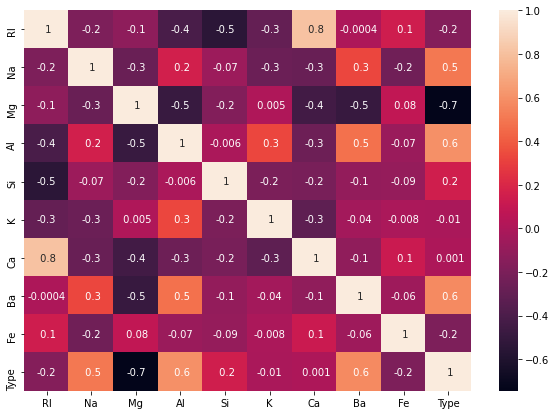

In [ ]:
plt.figure(figsize= (10,7))
sns.heatmap(df.corr(), annot = True, fmt= ' .1g')

Check if there is null value or not

In [ ]:
df.notnull().all()

RI      True
Na      True
Mg      True
Al      True
Si      True
K       True
Ca      True
Ba      True
Fe      True
Type    True
dtype: bool

In [ ]:
X = df.drop(columns= ['Type', 'Ca']).values
y = df.iloc[:, -1].values

Distributions

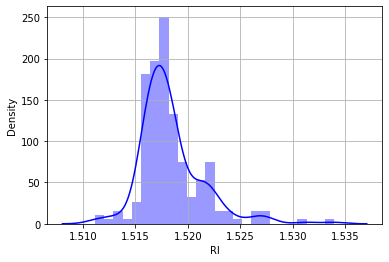

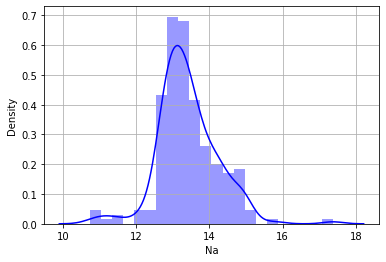

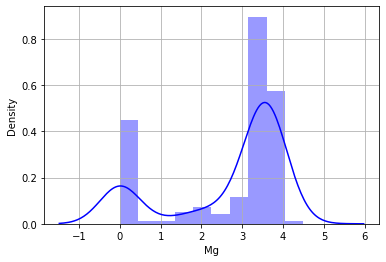

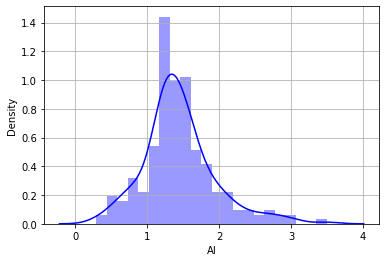

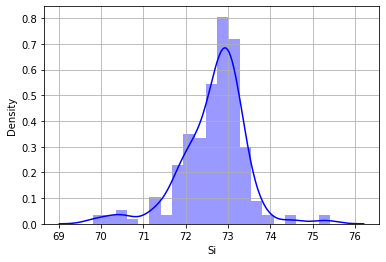

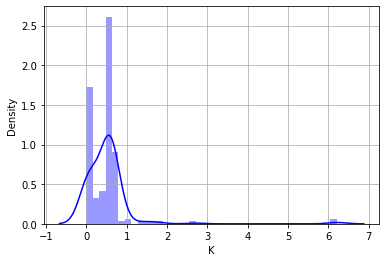

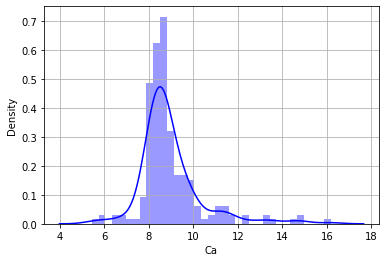

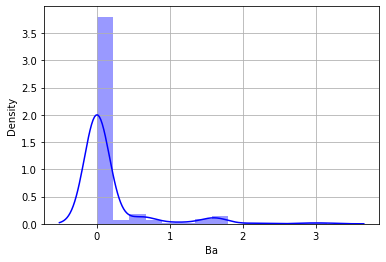

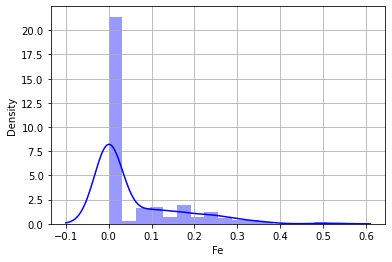

In [ ]:
for column in df.columns[:-1]:
  sns.distplot(df[column], color= '#0000FF')
  plt.grid(True)
  plt.show()

**4. Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**5. Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**6. Classification Models**




In [ ]:
accuracies = {}

Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix

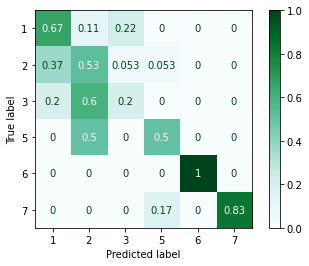

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Decision Tree Classification'] = accuracy

print(accuracy)

0.5813953488372093


Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Confusion Matrix

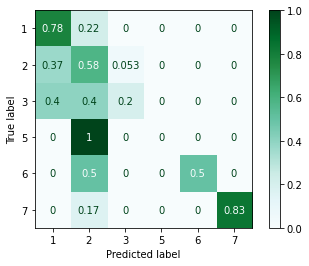

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Random Forest Classification'] = accuracy

print(accuracy)

0.5813953488372093


K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# metric = 'minkowski', p = 2 means Euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Confusion Matrix

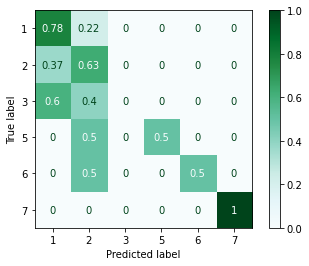

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['K-NN'] = accuracy

print(accuracy)

0.627906976744186


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Confusion Matrix

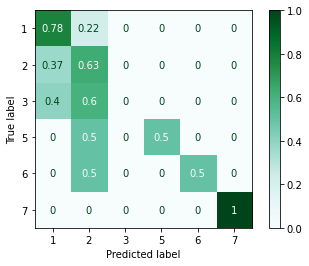

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Support Vector Machine'] = accuracy

print(accuracy)

0.627906976744186


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Confusion Matrix

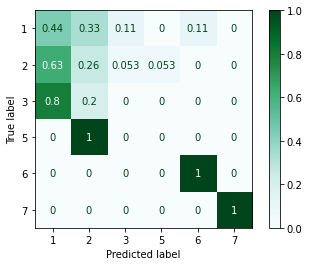

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.BuGn, normalize= 'true')
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Naive Bayes'] = accuracy

print(accuracy)

0.3953488372093023


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix

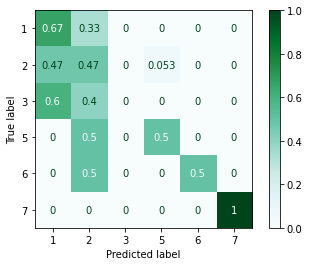

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = plt.cm.BuGn, normalize= 'true')
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracies['Logistic Regression'] = accuracy

print(accuracy)

0.5348837209302325


In [ ]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Decision Tree Classification,0.581395
1,Random Forest Classification,0.581395
2,K-NN,0.627907
3,Support Vector Machine,0.627907
4,Naive Bayes,0.395349
5,Logistic Regression,0.534884


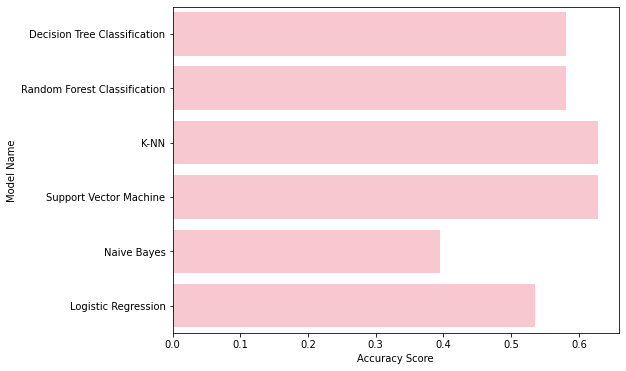

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'Model Name', x = 'Accuracy Score', data = accuracy_df, color = 'pink')
plt.show()